# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

As a part of Algoritma curicullum, students were asked to do capstone project to show off their knowledge and gained skills on data analytics. The raw data is scraped from https://www.exchange-rates.org/history/IDR/USD/T with BeautifulSoup4 library. Data period is between 31-May-2020 to 25-Nov-2020.


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [67]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [68]:
url_get.content[1:777]

b'\n<!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n    <html class="no-js ie8 oldie" lang=\'en\' xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js" lang=\'en\' xml:lang=\'en\'> <!--<![endif]-->\r\n<head><title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta content="C#" name="CODE_LANGUAGE" />\n<meta content="JavaScript" name="vs_defaultClientScript" />\n<meta content="http://schemas.microsoft.com/intellisense/ie5" name="vs_targetSchema" />\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\n<meta name="mapping" content="AP" />\n<base href="https://www.exchange-rates.org/" />'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [69]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [77]:
table = soup.find('table', attrs={'class':'history-data'})
print(table.prettify()[1:269])

table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    11/26/2020
   </td>
   <td>
    Thursday
   </td>
   <td>
    <a href="/Rate/USD/IDR/11-26-2020">
     14,090.70769
    </a>
    IDR
   </td>
   


The code below is basically a looping to append an empty list called 'temp' that will be appended with date and exchange rate on each row.

In [80]:
temp = [] #initiating a tuple

for i in range(1, len(tr)):

    #scrapping process
    row = table.find_all('tr')[i]
    
    #get date
    date = row.find_all('td')[0].text
    date = date.strip()
    
    #get rate
    rate = row.find_all('td')[2].text
    rate = rate.strip()
    
    temp.append((date,rate))
    
temp = temp[::-1]
temp[0:5]

[('5/31/2020', '14,664.14584 IDR'),
 ('6/1/2020', '14,586.73900 IDR'),
 ('6/2/2020', '14,382.27395 IDR'),
 ('6/3/2020', '14,060.78946 IDR'),
 ('6/4/2020', '14,113.82802 IDR')]

## Creating data frame & Data wrangling

Put the array into dataframe

In [58]:
import pandas as pd

df = pd.DataFrame(temp, columns=('date','rate'))
df.head()

,date,rate
0,5/31/2020,"14,664.14584 IDR"
1,6/1/2020,"14,586.73900 IDR"
2,6/2/2020,"14,382.27395 IDR"
3,6/3/2020,"14,060.78946 IDR"
4,6/4/2020,"14,113.82802 IDR"


Do the data cleaning here. Both 'date' and 'rate' columns has object type, those columns need to converted as 'datetime64' and ''float64' respectively. 'rate' column also need to be cleaned from unnecesary strings.

In [59]:
df['date'] = pd.to_datetime(df['date'])
df['rate'] = df['rate'].str.replace(',','')
df['rate'] = df['rate'].str.replace(' IDR','')
df['rate'] = df['rate'].astype('float64')

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:xlabel='date'>

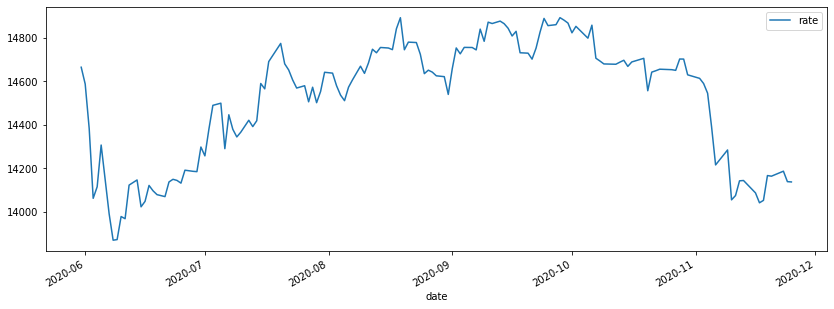

In [83]:
df.set_index('date').plot(figsize = (14,5))

<AxesSubplot:>

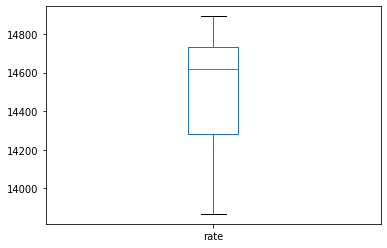

In [84]:
df.plot.box()

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.